**Variable definitions in the Dataset**

- **_Age_**: Age of the patient
- **_Sex:_** Sex of the patient
- **_exang:_** exercise induced angina (1 = yes; 0 = no)
- **_ca:_** number of major vessels (0-3)
- **_cp:_** Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **_trtbps:_** resting blood pressure (in mm Hg)
- **_chol:_** cholestoral in mg/dl fetched via BMI sensor
- **_fbs:_** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **_rest_ecg:_** resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **_thalach:_** maximum heart rate achieved
- **_target:_** 0= less chance of heart attack 1= more chance of heart attack


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/project csv/heart[1].csv')

In [3]:
df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [6]:
df.columns = new_columns


In [188]:
df.head(10)

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597
5,57,1,0,148,0,1,0,1,1,140,0.632456
6,56,0,1,153,0,1,0,2,1,140,1.140175
7,44,1,1,173,0,2,0,3,1,120,0.000000
8,52,1,2,162,0,2,0,3,1,165,0.707107
9,57,1,2,174,0,2,0,2,1,150,1.264911


In [8]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### 2.3.1 Analysis Outputs(1) <a id = 9></a>

* The Data Set consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format. (Integer Or Float)
* According to first impressions, there is no missing value(NaN Value) in the data set.

####  Examining Missing Values <a id = 11></a>

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [189]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
thalach,0
exang,0
slope,0
ca,0
thal,0
target,0
trtbps_winsorize,0


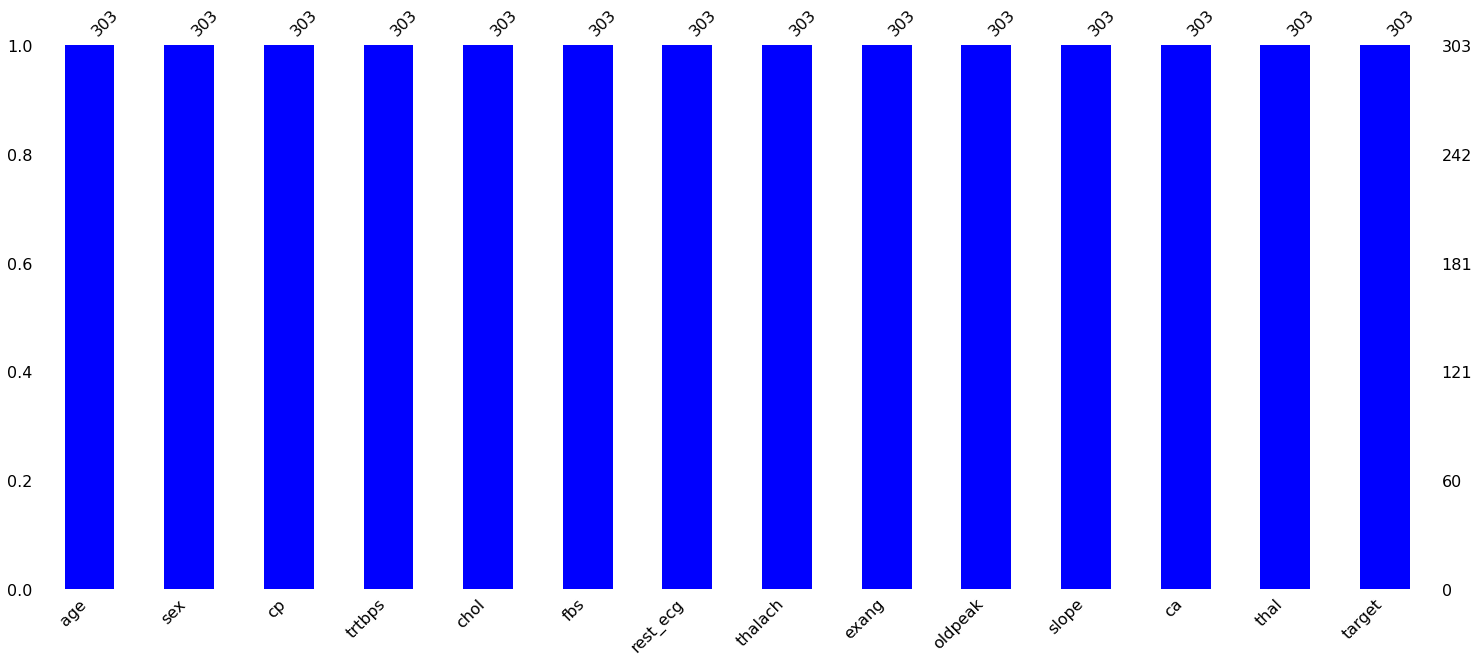

In [12]:
import missingno
missingno.bar(df, color = "b")
plt.show()

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [15]:
df["cp"].value_counts().sum()

303

In [16]:
df["cp"].value_counts().count()

4

In [17]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


#### Analysis Outputs(2) <a id = 13></a>
* **According to the result from the unique value dataframe;** 
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, **Numeric Variables:** “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* **Categorical Variables:** "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target" 
* In the next section, we will separate these 2 groups into 2 different lists.


separating variables (numeric or categorial)


In [18]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

In [20]:
# We applied the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()
# The analyzes we infered from the describe method are below the graphs of each variable below.

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


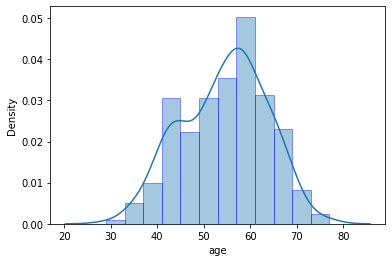

In [21]:
# "age" variable
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "b"));

#### Analysis of "age" variable according to Describe() method
* The minimum value of the ages is 29, and the maximum value is 77.
* So, if we don't look at other data, only these two data should mean that the midpoint must be 53 from the mathematical operation ((29 + 77) / 2). 
* The mean of the data for the age is 54. Isn't the average of the minimum and maximum values that we found just by mathematical calculations 53? 
* They are almost equal to each other. 
* That means the age variable has a normal distribution. The normal distribution is the ideal statistical distribution for us.
* Let's look at the quartiles. 
* The data average is in the middle of the 25% and 75% quarters. This means that the age variable is prone to the normal distribution.

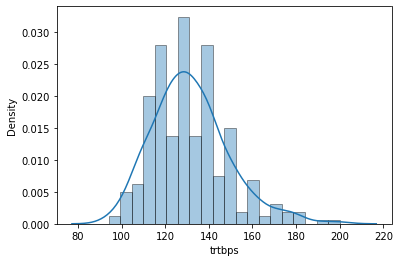

In [22]:
# "trtbps" variable
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

#### Analysis of "trtbps" variable according to Describe() method

* The minimum value for the "trtbps" variable is 94, and the maximum value is 200. The average of these two numbers is 147. 
* The major average is 131.
* There is not much difference between 131 and 147. "trtbps" data tends to be normally distributed. 
* However, very little data remains on the left side of 147. This means that when we take the midpoint of the minimum value and the maximum value as a basis, the data on the left is more than on the right. 
* So, there will be a small queue towards the right side due to the lack of data on the right side. 
* In summary, we can say that this data is prone to a normal distribution, but there is a slight right skew.


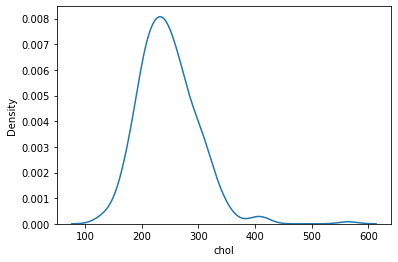

In [23]:
# "chol" variable
sns.distplot(df["chol"], hist = False);

#### Analysis of "chol" variable according to Describe() method
* The minimum value for the "chol" variable is 126, and the maximum is 564. The middle of these two values is 345.
* The major average is 246.
* When viewed, the mean is slight to the left of the midpoint of the minimum and maximum value.
* Let's check the quartiles. There are values up to 274 in the first 75 percent. Considering that the maximum value is 564, we see that most of the data is on the left. 
* So data is slightly skewed to the right due to values that outlier


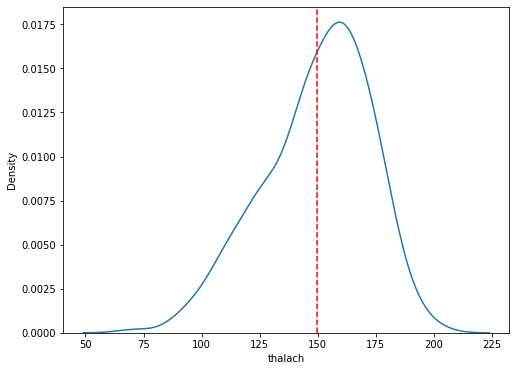

In [24]:
# "thalach" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--");

#### Analysis of "thalach" variable according to Describe() method
* The minimum value of the "thalach" variable is 71. The maximum value is 202. According to these two values, the midpoint value is 137.
* The central average is 149.6
* So there is a left skew, although not much.
* When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
* As a result, the data tends to be normally distributed, but there is a slight left skew.


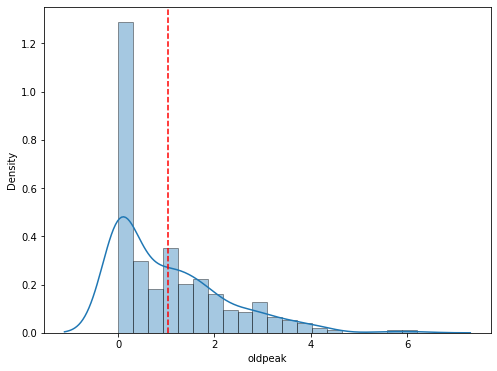

In [25]:
# "oldpeak" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

#### Analysis of "oldpeak" variable according to Describe() method
* The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
* When we look at the mean, we see that it is 1.03
* When we examine the quartiles, 75% of the data consists of values up to 1.60
* This shows that; There is an incredible right skew in the data.


uni variate analysis
Numerical Variables(Analysis with **Distplot**)

In [26]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [27]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [28]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

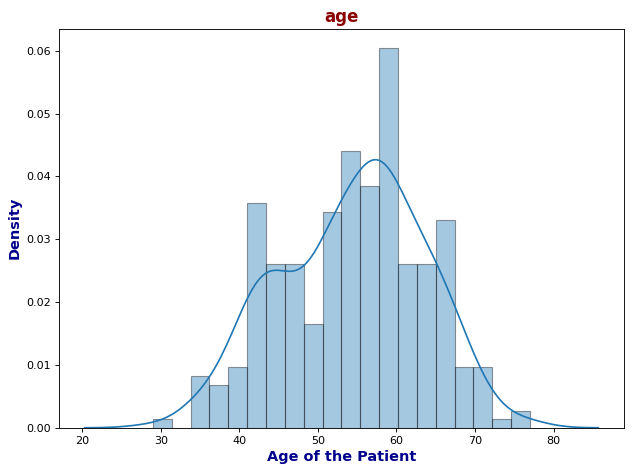

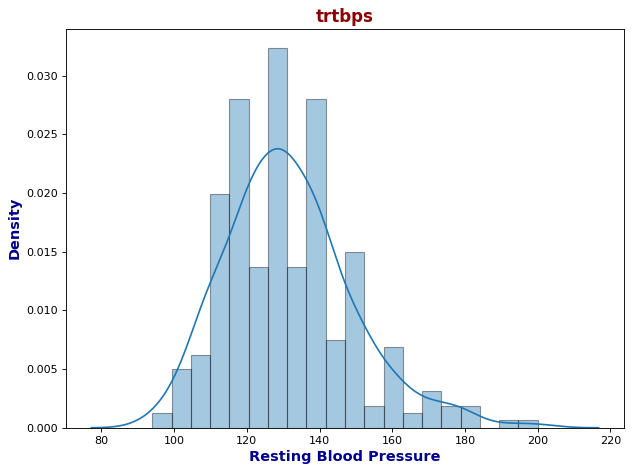

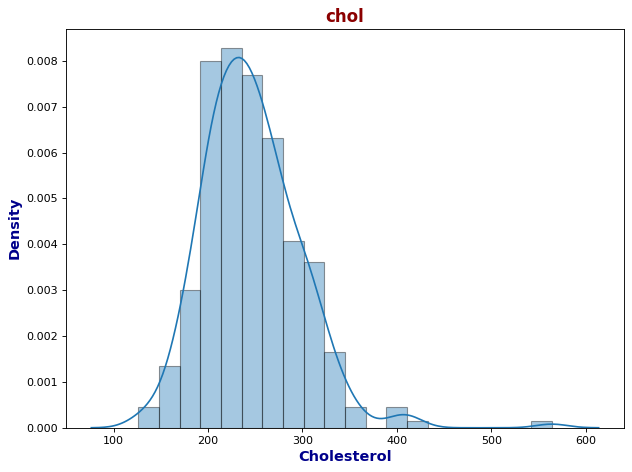

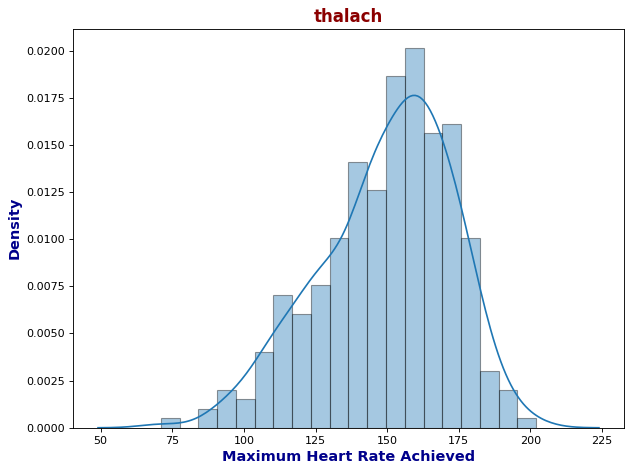

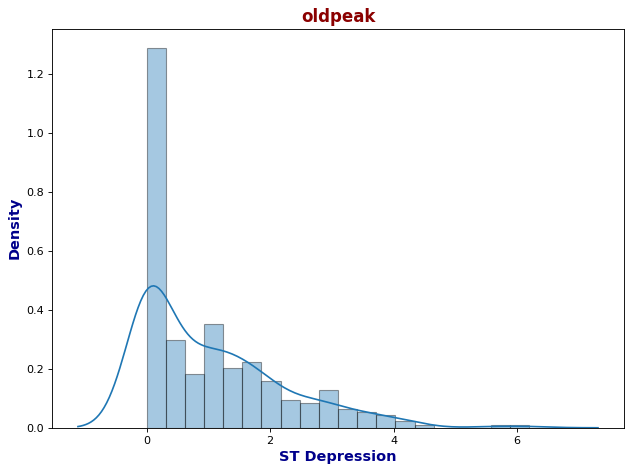

In [29]:
title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = { "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### 4.1.1.1 Analysis Outputs(4) <a id = 20></a>


#### Age Variable
* The vast majority of patients are between 50 and 60. 
* There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50. 
* It looks like there are no outliers in the variable.

#### Trtbps Variable
* The resting blood pressure of most patients is generally between 110 and 140. 
* Values after 180 can be considered as outliers. 
* There is hefty patient traffic between 115-120, 125-130, and 155-160 values.

#### Cholesterol Variable
* Cholesterol value in most patients is between 200-and 280.
* Values after 380 can be considered as outliers.

#### Thalach Variable
* The maximum heart rate achieved in most patients is between 145-and 170.
* In particular, The values before 80 can be considered outliers. 

#### Oldpeak Variable
* Values of the vast majority of patients in the variable range from 0 to 1.5. 
* Especially values after 2.5 can be considered as outliers.

categorial variables analysis 

In [30]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [31]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [32]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [33]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [34]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [35]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


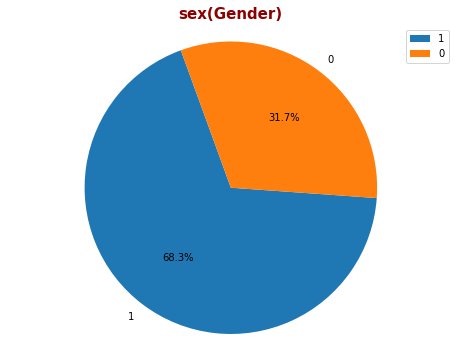

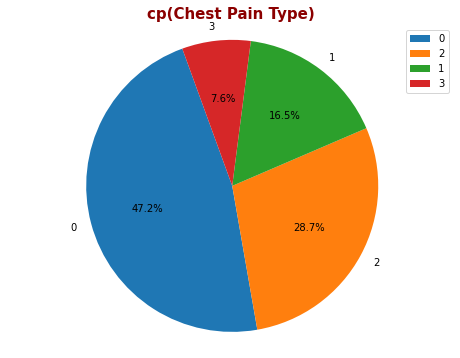

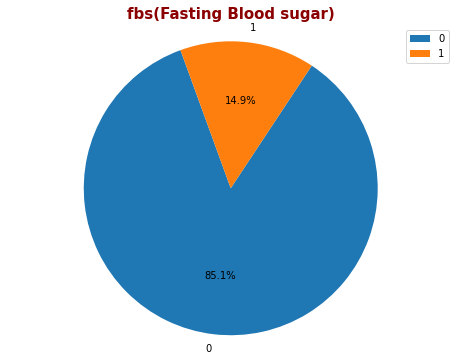

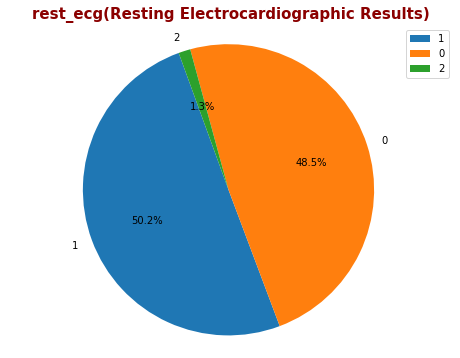

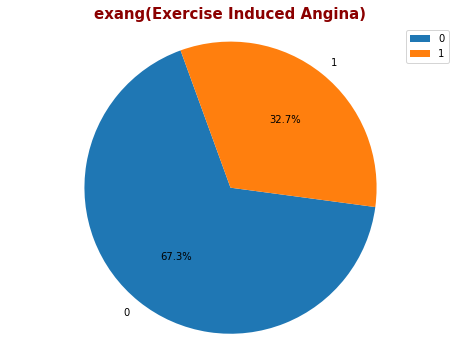

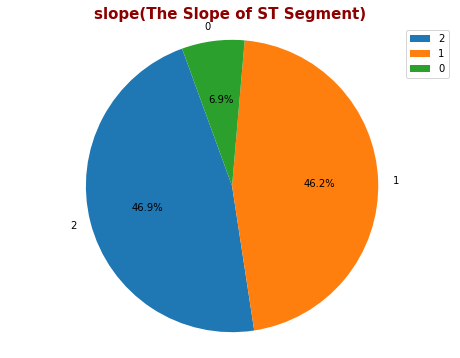

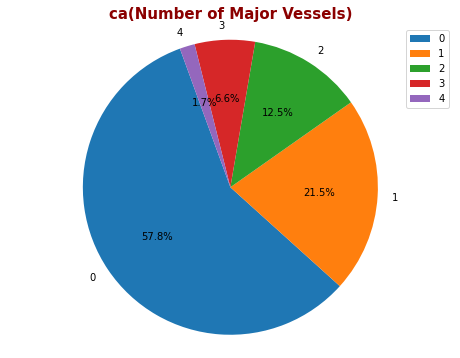

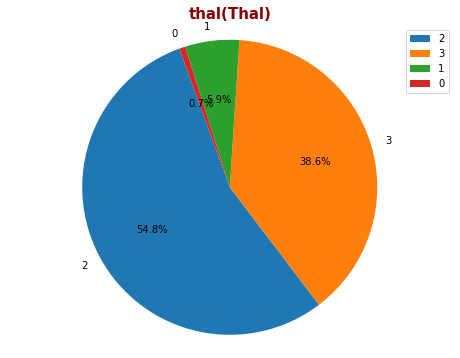

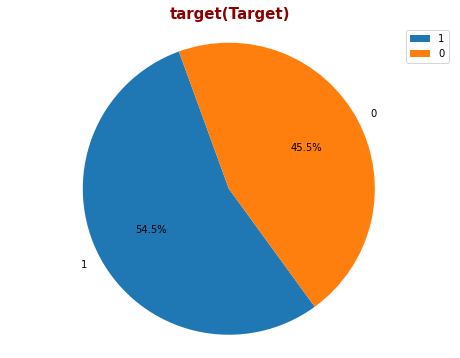

In [36]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

#### 4.1.2.1 Analysis Outputs(5) <a id = 22></a>

#### Sex Variable
* **68.3%** of the patients are **male**, **31.7%** are **female**.
* So, the number of male patients is more than twice that of female patients.

#### Cp Variable
* Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
* Half of the patients are asymptomatic; they have pain without symptoms.
* If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
* In other words, atypical angina is in **29%** of the patients.
* This observation value shows patients with shortness of breath or non-classical pain.
* The other two observation values are less than the others.
* **16.5%** of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
* The other **8%** has the value of non-anginal pain, which is three types of angina.
* Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

#### Fbs Variable
* The vast majority of patients have an observation value of 1. In other words, **85%**.
* The fasting blood sugar of these patients is more than 120 mg/dl. 
* The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level. 

#### Rest_ecg Variable
* The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible. 
* It has a value of **1.3 percent**. When we look at all of these patients, **it is not a very important number**.
* This value represents the ST and T wavelengths of the patients.
* Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal. 
* The size of those with 1, that is, the orange part on the graph is **50.2%**
* This means that the resting electrocardiographic results of these patients are **normal**. 
* The percentage of patients with a value of 0 is **48.5%**. 
* That is, the patients' values of **48.5%** are **normal**.

#### Exang Variable
* We have said that this variable stands for exercise-induced angina.
* Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
* According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
* In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

#### Slope Variable
* The minimum observation value is 0 with **7 percent**. 
* This is patients with a downward slope of the ST wavelength.
* The other two observation values are almost equal to each other. 
* The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

#### Ca variable 
* This variable is the number of great vessels colored by fluoroscopy. 
* In more than half of the patients, **57.8 percent**, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
* After 0 observation value, the other value with the most slices in the pie chart 1
* The number of large vessels observed in **21.5%** of the patients is 1
* The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

#### Thal Variable
* The "Thal" variable is short for the "Thallium stress test."
* The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
* There are three observation values in the description of this variable. However, the pie chart shows four values. Values **0, 1, 2 and 3**.
* According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
* In this context, according to the thallium stress test results, **54.8 percent** of the patients have two observation values, so the test result appears to be expected.
* **36.8 percent** has a value of **3**, so we can say that this value is a reversible defect as an explanation.
* **5.9 percent** of patients have a value of **1**, so the test result for these patients is a fixed defect.

#### Target Variable
* More than half of the patients, **54.5 percent**, have a heart attack risk. The remaining **45.5 percent** have no heart attack risk.

#### 4.1.2.2 Examining the Missing Data According to the Analysis Result <a id = 23></a>
[Go to Project Content](#63)

In [37]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [38]:
df["thal"] = df["thal"].replace(0, np.nan)

In [39]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [40]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [41]:
df["thal"].fillna(2, inplace = True)

In [42]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [43]:
df


,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


In [44]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [45]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [46]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [47]:
df["thal"].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

#### 4.2 Bi-variate Analysis <a id = 24></a>

#### 4.2.1 Numerical Variables - Target Variable(Analysis with FaceGrid) <a id = 25></a>

In [48]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [49]:
numeric_var.append("target")

In [50]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


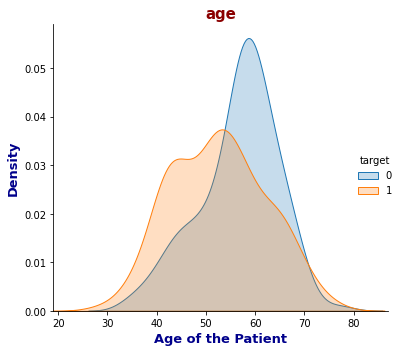

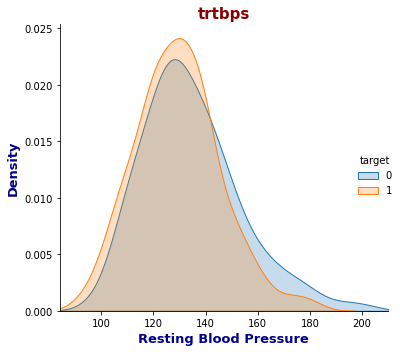

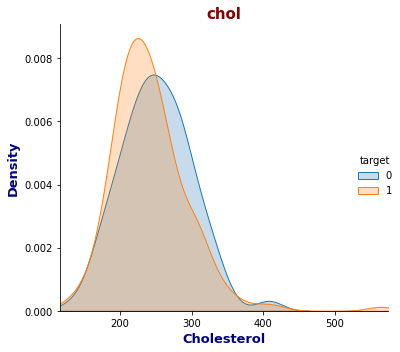

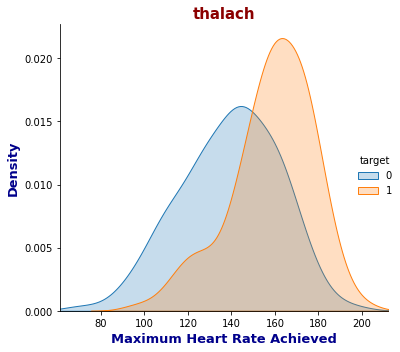

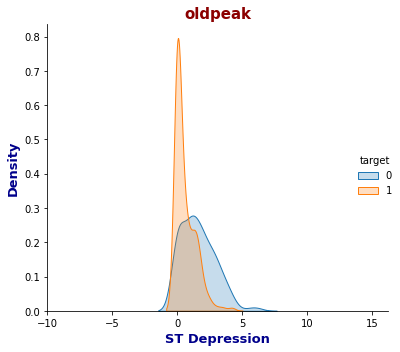

In [51]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [52]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [53]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### 4.2.1.1 Analysis Outputs(6) <a id = 26></a>

#### Note : 
* The **KDE plot** shows the density of the feature for each value of the target variable. There are usually two-colored humps representing the two values of the Target variable. If the humps are well-separated and non-overlapping, there is a correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

#### Age - Target Variable 

* There is some interesting data in this chart. Typically, the general belief is that heart attack increases with age.
* However, the graph tells us that we are wrong about this. 
* If you have noticed, the number of people at risk of heart attack decreases as age progresses.
* Let's take 55 as a base. There is an incredible increase in the blue graph after 55. In other words, there is a decrease in heart attack risk after the age of 55.
* On the contrary, a decrease occurs after 55 in the orange graph. In other words, there is a decrease in the risk of heart attack after the age of 55.
* To summarize, It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case. 
* And **correlation** between them **-0.225439**. There is a **negative correlation**, which we can call **little**.

#### Trtbps - Target Variable

* It is complicated to predict whether a patient will have a heart attack from resting blood pressure data.
* Because if you notice, the two graphs are almost identical. 
* For example, according to the "trtbps" value of two possibilities, 130 is the maximum point.
* Also, the Bumps on the graph overlap too much.
* This means that the feature does not correlate well with the Target variable. So, in summary, A patient with a "trtbps" value of 130 may or may not be likely to have a heart attack. 
* And according to the graph, we can say that there is little correlation between the two variables. **Correlation between** them **-0.144931**. There is a **negative correlation**, which we can call **little**.

#### Chol - Target Variable

* In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients. 
* If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
* After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.
* The **correlation** between the two variables is **-0.085239**. In other words, we can say that it is **negative**, but **very little**.

#### Thalach - Target Variable

* There is a situation that is evident in this graph.
* The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
* If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.
* It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
* The **correlation** between the two variables is **0.421741**. In other words, we can say that it is **positive** and **moderate**.

#### Oldpeak - Target Variable

* When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack. 
* We can say that the range of 0 to 1.5 is the critical threshold for us.
* It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
* The **correlation** between the two variables is **-0.430696**. In other words, we can say that it is **negative** and **moderate**.

#### 4.2.2 Categorical Variables - Target Variable(Analysis with Count Plot) <a id = 27></a> 


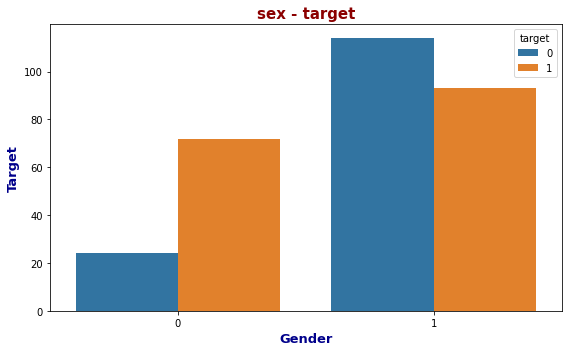

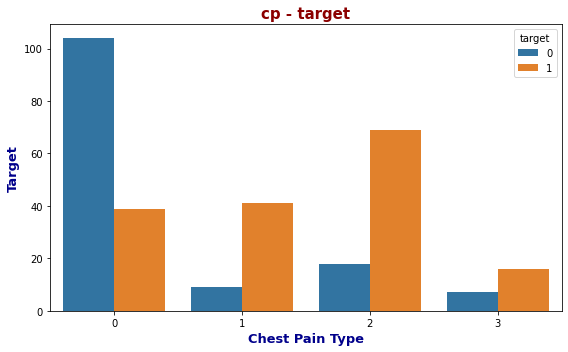

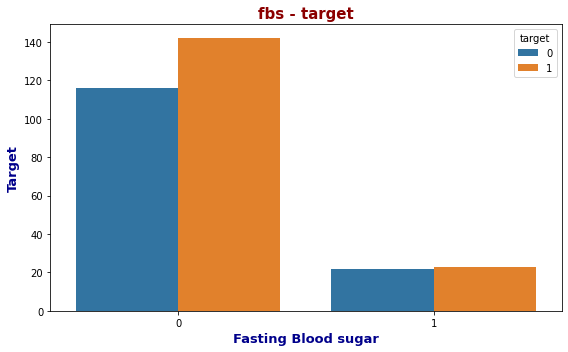

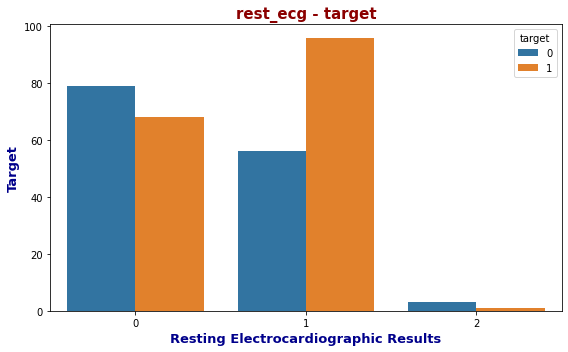

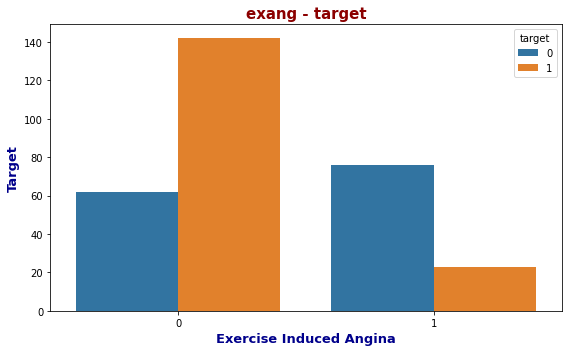

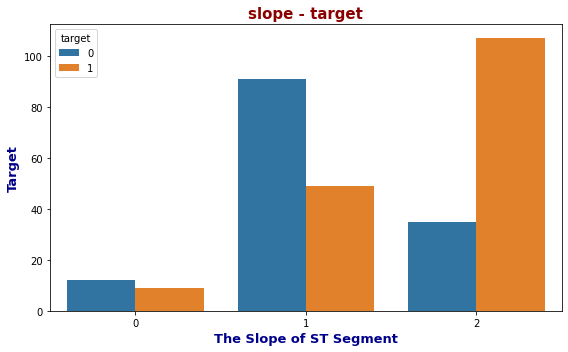

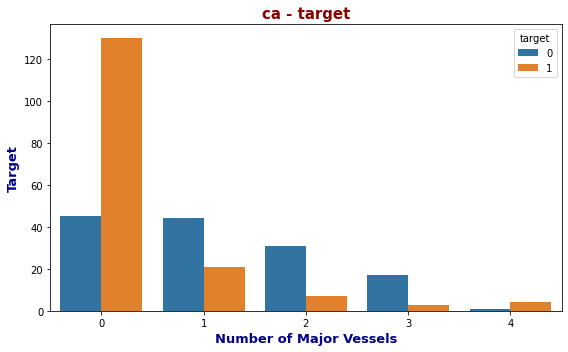

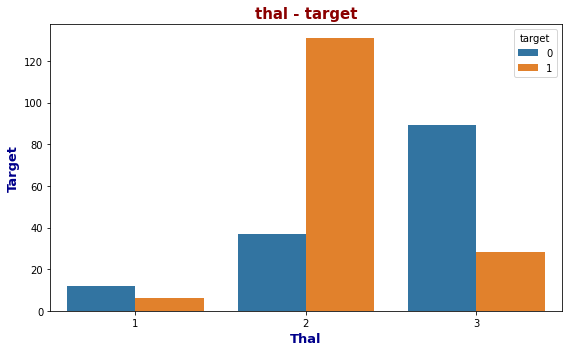

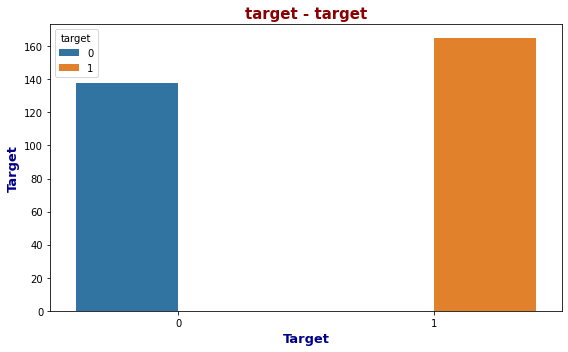

In [54]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(i, data = df[categoric_var], hue = "target")
    
    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [55]:
df[categoric_var].corr()


,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [56]:
df[categoric_var].corr().iloc[:, [-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


#### 4.2.2.1 Analysis Outputs(7) <a id = 28></a>

#### Sex - Target Variable

* Patients at high risk of heart attack from women are almost more than half of those with low.
* The situation is different for those with an observation value of 1, that is, for men. The blue-colored bar has more observation values. 
* So men are more likely than not to have a heart attack.
* **In summary, female patients are at higher risk for heart attack**
* The correlation between the two variables is **-0.280937**. In other words, we can say that there is a **negative low-intensity correlation**.

#### Cp - Target Variable

* First bar graph has an observation value of 0, asymptomatic pains. This pain was pain that occurred without symptoms. 
* Patients with this pain are less likely to have a heart attack. When we look at the probability of not having a heart attack, we can say that it is almost three times the other.
* In the other three types of pain, having a heart attack is almost three times higher than the risk of not having it.
* **In summary, If a patient's "cp" variable is 1, 2, or 3, we can say that the risk of heart attack is high.**
* The correlation between the two variables is **0.433798**. In other words, we can say that there is **a positive, moderately strong correlation**.


#### Fbs - Target Variable

* The risk of heart attack is slightly higher in those with a 0 observation value as fasting blood sugar.
* **Patients with fasting blood sugar lower than 120 mg/dl can be positioned as risky.**
* If we look at the value of 1 observation value, the situation seems to be somewhat equal here.
* In other words, it is a little challenging to say anything definite about heart attack in patients with fasting blood sugar greater than 120 mg/dl.
* The correlation between the two variables is **-0.028046**. In other words, we can say that there is **a very low-intensity correlation in the negative direction**.


#### Rest_ecg - Target Variable

* **Attention should be paid to patients with a "rest ecg" value of 1**. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack. 
* The other two observation values are also more likely not to have a heart attack.
* * The correlation between the two variables is **0.137230**. In other words, we can say that there is a **positive low-intensity correlation**.

#### Exang - Target Variable

* Pain due to exercise does not affect the heart attack.
* If the patient's "exang" variable is 1, that is, if he has exercise-related angina, the probability of not having a heart attack is higher. 
* In contrast, patients who do not have exercise-related angina are more likely to have a heart attack.
* **This means that exercise-related pain has nothing to do with a heart attack.**
* The correlation between the two variables is **-0.436757**. In other words, we can say that there is **a negative, moderately strong correlation**.

#### Slope - Target Variable

* **It is necessary to pay attention to the patients with a "slope" variable of 2.**
* Because patients with an observation value of 2 are three times more likely to have a heart attack than not having a heart attack.
* If we examine other values, the risk of heart attack is lower in patients with an observation values of 0 and 1. 
* Especially if the observation value is 1, if it has a flat slope, we can say that it is two times more likely not to have a heart attack.
* The correlation between the two variables is **0.345877**. In other words, we can say that there is **a positive, moderately strong correlation**.

#### Ca - Target variable 

* The group at risk for this variable is patients with an observation value of 0.
* If you notice, the risk of heart attack is almost three times higher in patients with an observation value of 0.
* For 1, 2, and 3 observation values, this shows the opposite situation. In other words, patients with "ca" observation values of 1, 2, and 3 are almost twice as likely to have a heart attack as those not having them.
* There is something remarkable here. Although the number of patients with a "CA" value of 4 is less than the general population, the risk of having a heart attack seems to be higher.
* The correlation between the two variables is **-0.363322**. In other words, we can say that there is **a negative, moderately strong correlation**.


#### Thal - Target Variable

* Patients with an observation value of 2 are three times more likely to have a heart attack than if they have not. 
* The opposite is true for other values. The situation of not having a heart attack appears to be higher.
* The correlation between the two variables is **-0.363322**. In other words, we can say that there is **a negative, moderately strong correlation**.

#### 4.2.3 Examining Numeric Variables Among Themselves(Analysis with **Pair Plot**) <a id = 29></a> 


In [57]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [58]:
numeric_var.remove("target")

In [59]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


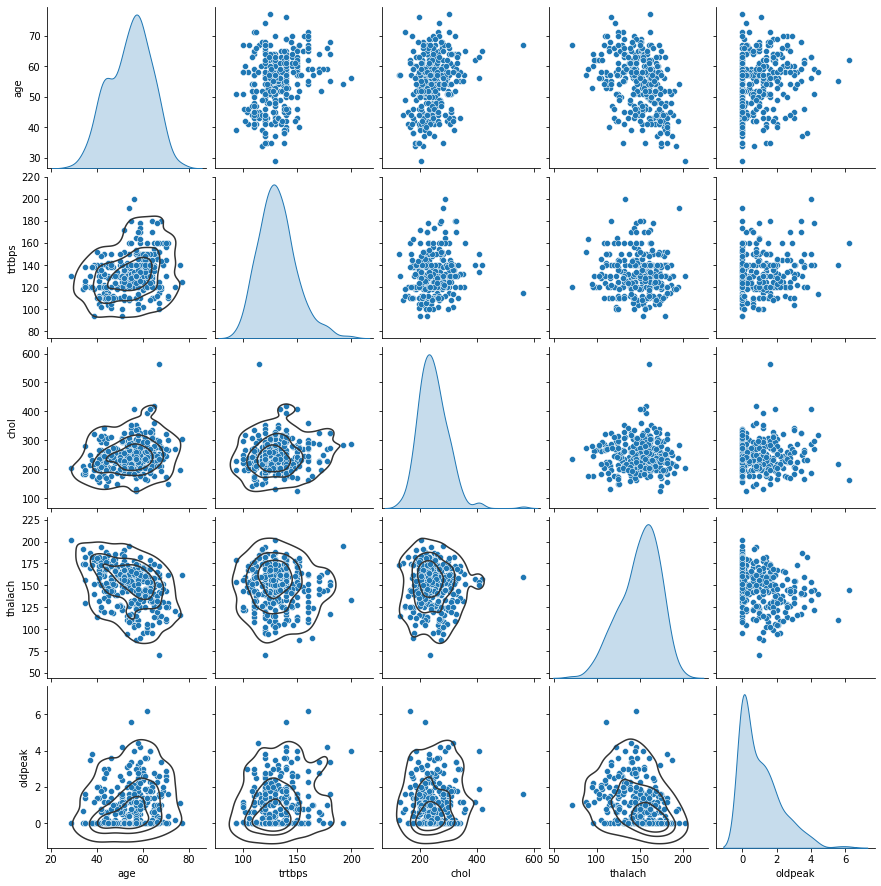

In [60]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

#### 4.2.3.1 Analysis Outputs(8) <a id = 30></a>

#### Note : 

*  The **pair plot** allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

* The **scatter plot**; is a drawing or mathematical diagram that typically uses Cartesian coordinates to display the values of two variables in a dataset. If the points are close to each other and have a regular appearance in terms of their directions, we can say a strong connection between the two variables. There is a directly proportional relationship between two variables in positive directional relationships. An increase in one variable causes an increase in the other variable. In negative relationships, there is an inversely proportional relationship between the variables. When the value of one variable decreases, the other variable also decreases.

#### Age Variable

* The age variable with the most relationship is the "thalach" variable. 
* There is a collection of points extending in the southwest direction. 
* There is a negative correlation since the points are pointing downwards.
* However, since the points are somewhat scattered, this correlation is moderate.

#### Trtbps Variable

* The relationship between "Trtbps" and other variables is weak. 
* There is clutter in the graphics in general.
* With the age variable, the dots appear a little more often. There is a positive correlation.
* The lowest correlation is with the "thalach" variable. The dots are incredibly messy. There is no smooth distribution.

#### Chol Variable

* The variables that have the highest correlation with the variable "chol" are "age" and "trtbps". 
* However, the relationship between the "age" variable is slightly higher.
* So cholesterol increases with age.
* There is almost no relationship with other variables.

#### Thalach Variable 

* The age variable has the most relationship with the Thalach variable. There seems to be a moderately negative relationship. 
* There is not much correlation between the variable "trtbps" and "chol". The dots are too scattered. 
* When we look at the relationship with the "old peak" variable, we can say a close relationship with the middle level.

#### Oldpeak Variable

* We cannot find an explicit expression when interpreting the graphics of this variable because the relationship with all variables is similar to each other.
* However, we can say this in general: There is a close relationship with moderate with all variables.

#### 4.2.4 Feature Scaling with the RobustScaler Method <a id = 31></a> 


In [61]:
from sklearn.preprocessing import RobustScaler

In [62]:
robust_scaler = RobustScaler()

In [63]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [64]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [65]:
type(scaled_data)


numpy.ndarray

In [66]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


#### 4.2.5 Creating a New DataFrame with the Melt() Function <a id = 32></a> 

In [67]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)


In [68]:
df_new.head()


,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [69]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables", value_name = "value")


In [70]:
melted_data


,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


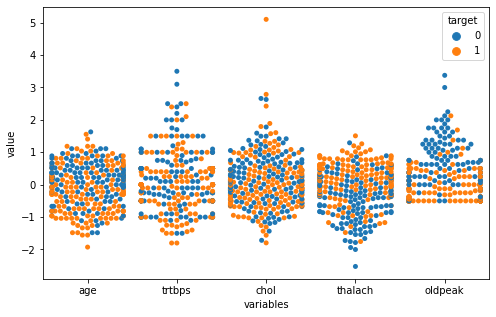

In [71]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value", hue = "target", data = melted_data)
plt.show()

#### 4.2.6 Numerical Variables - Categorical Variables (Analysis with **Swarm Plot**) <a id = 33></a> 


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


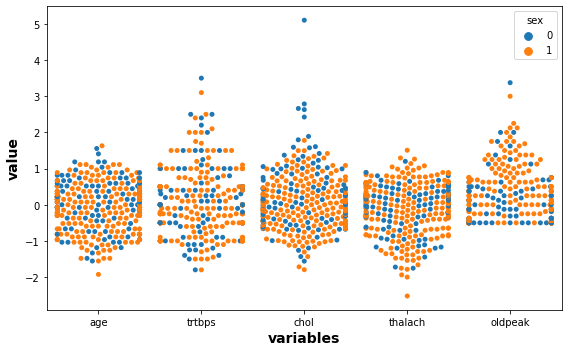

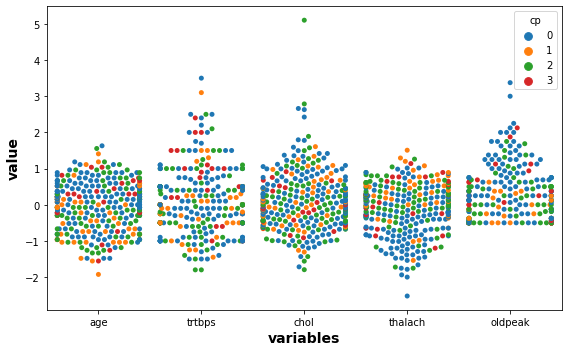

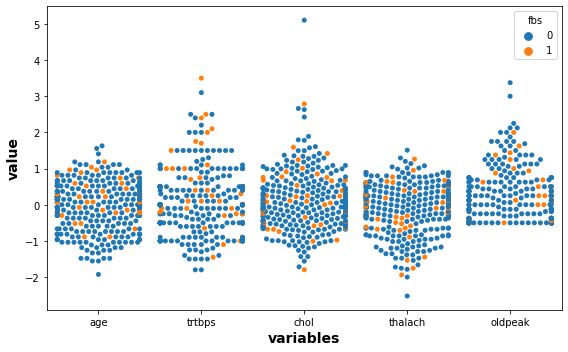

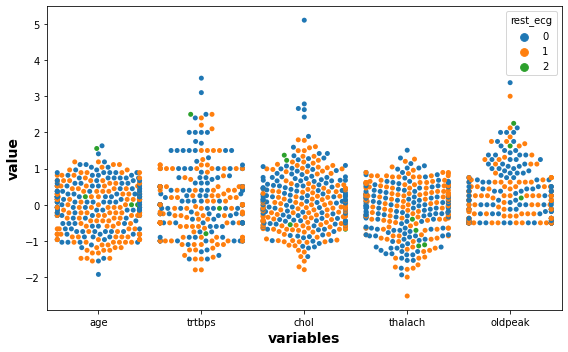

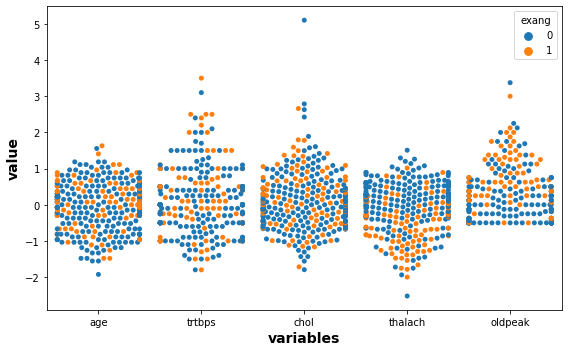

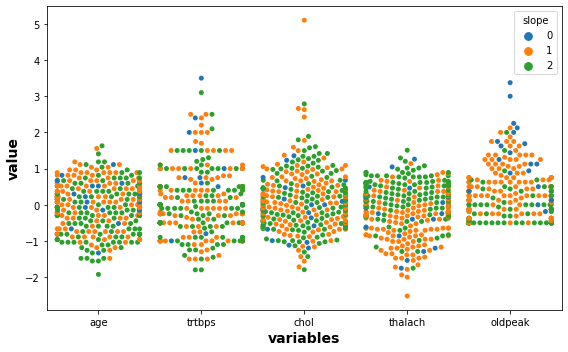

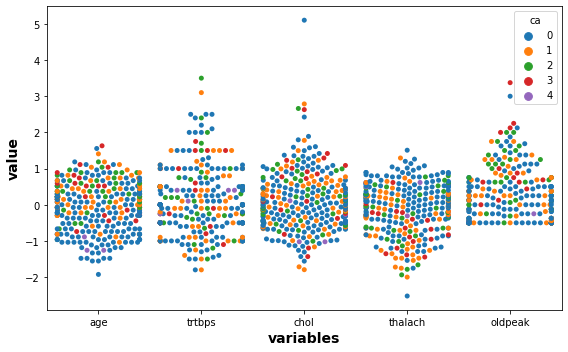

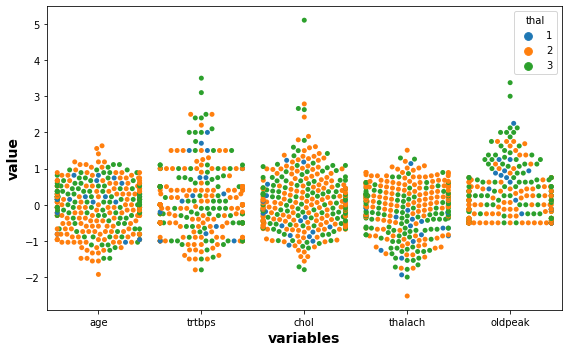

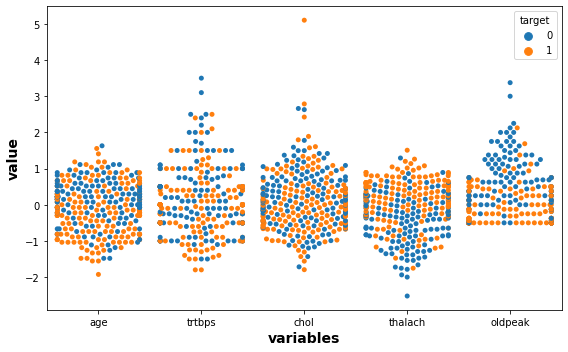

In [72]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### 4.2.6.1 Analysis Outputs(9) <a id = 34></a>

#### Note:
* The **swarm plot** is a scatter plot used to represent categorical values. It is very similar to the strip plot, but it avoids overlapping points. It is not advisable to use this type of graph when the sample size is large.

#### Sex - Numeric Variables

* Colors are intertwined between "sex" and other numerical variables in the graphics. It isn't easy to distinguish. 
* In summary, the relationship between the categorical "sex" variable and the numerical variables is weak.

#### Cp - Numeric Variables

* The variable that has the most relationship with the "cp" variable is the "thalach" variable. Each color appears in separate clusters, albeit slightly. 
* In particular, individuals with an observation value of 0 appear distinctive.
* So chest pain has a moderate correlation with maximum attained heart rate.
* Observation units from other variables are intertwined. So there doesn't seem to be much correlation.

#### Fbs - Numeric Variables

* Variables in orange in this graph have a small number. And this color is very scattered in the blue color. 
* Therefore, no variable has a very high correlation between the "Fbs" 

#### Rest_ecg - Numeric Variables

* There is no strong relationship between the "rest_ecg" variable and the numeric variables due to the complexity of the colors in the chart.

#### Exang - Numeric Variables

* The numerical variable that exercise-induced chest pain is most associated with is the "thalach" variable. Orange dots are clustered below, blue dots above. 
* There is a better relationship between the "exang" and the old peak variables than the other. Of course, it is not as much as the "thalach" variable, but we can say that there is a moderate correlation.
* Colors look very messy in the graphs of other variables. Therefore, there is a low correlation between them.

#### Slope - Numeric Variables

* The variables that the Slope variable has the most vital relationship with are the "thalach" and "old peak" variables. In these two variables, the colors can be observed separately. 
* The same is not the case when we control the other three variables. The colors are very homogeneously distributed. It isn't straightforward to distinguish. We can say that there is a low correlation.

#### Ca - Numeric Variables

* The variables with which the "Ca" variable is correlated are the "age", "thalach," and "old peak" variables. A distinction can be seen between these variables.
* However, there is not a very strong correlation. We can say that it is below the middle level.

#### Thal - Numeric Variables

* It seems to have a little more to do with "old peak". The same is valid with the "thalach" variable. The colors look a little more evenly clustered. 

#### Target - Numeric Variables

* The numerical variables with which the "target" variable has the most relationship are the "thalach" and "old peak" variables. Colors appear clustered.
* Because the colors are distributed homogeneously in other variables, there is not much relationship between them. We can say that there is a low-level correlation.

#### 4.2.7 Numerical Variables - Categorical Variables (Analysis with **Box Plot**) <a id = 35></a> 


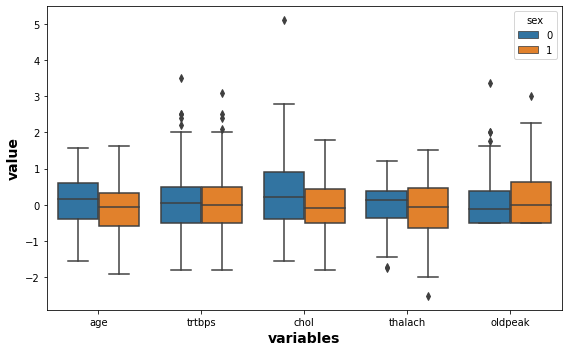

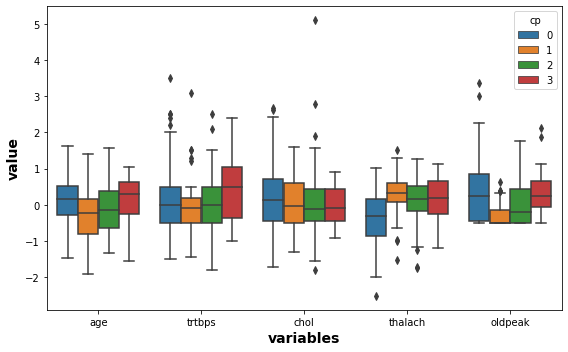

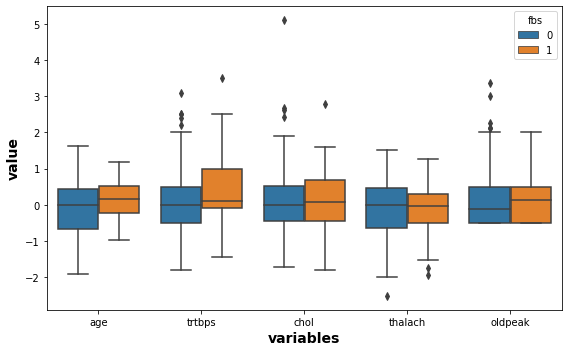

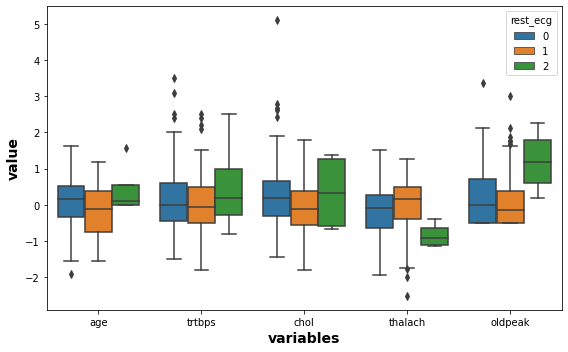

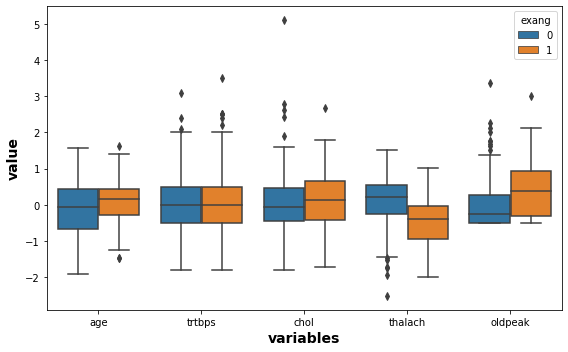

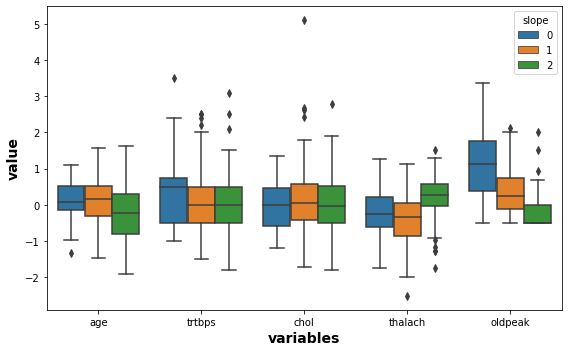

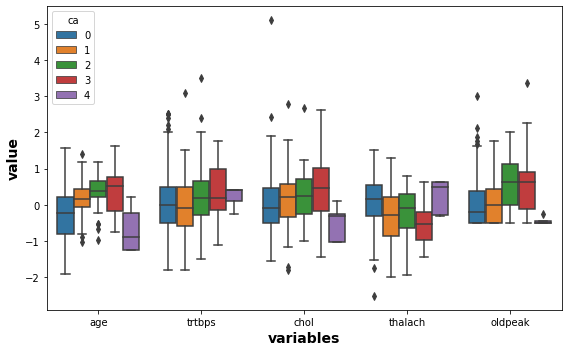

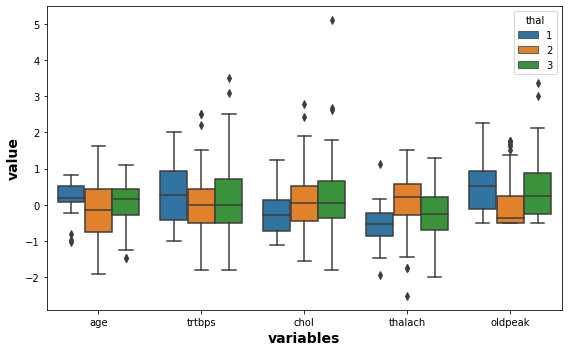

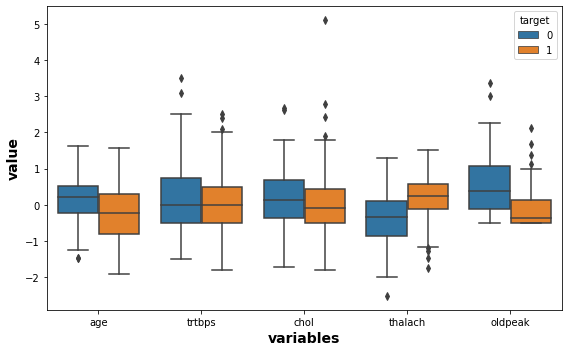

In [73]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

#### 4.2.7.1 Analysis Outputs(10) <a id = 36></a>

#### Sex - Numeric Variables

* There is no very high correlation between "sex" and numerical variables. There is a weak relationship with all of them.
* When the boxes of the observation values ​​of the gender variable are examined, it is seen that it is difficult to distinguish from each other.

#### Cp - Numeric Variables

* There is a relationship between the "cp" and the "thalach" variables. The median of the blue box displays a shape outside of all the other boxes. * * In general, although there is not much difference between the Boxes, we can say that they have a higher relationship than the others. 
* So, "cp", that is, chest pain, has a higher correlation with the maximum heart rate achieved.
* The relationship with other variables is weak.

#### Fbs - Numeric Variables

* In general, it isn't easy to do between boxes. The median values ​​intersect with each other's boxes.
* Therefore, we can directly say a weak relationship between the "fbs" variable and the numerical variables.

#### Rest_ecg - Numeric Variables

* There is a point to be noted here. When we look directly at the box plot graph, the "slope" variable seems to have a high correlation with the "thalach" and "old peak" variables. The green boxes stand apart from the others and are noticeable because of their separation.
* The green box represents patients with Hypertrophy. However, the number of these patients is deficient compared to others. In other words, we can say that it is a number that will not affect the main result when we consider the general.
* In this context, we should evaluate without considering the green boxes while making our evaluation here.
* When we interpret it that way, we see no strong relationship between the slope variable and other variables.
* Because the median values of the patients whose observation values are 0 and 1, that is, of the blue and orange boxes, cut each other's boxes. It is challenging to make a distinction.
* In summary, we can say that the relationship between the "rest ecg" variable and the numerical variables is weak.

#### Exang - Numeric Variables

* There is a correlation between the "Exang" and "Thalach" variables. A clear distinction can be made between the boxes. 
* They have a similar relationship with the "old peak" variable.
* There does not appear to be a relationship with the other three numerical variables.

#### Slope - Numeric Variables

* There is a relationship between "slope" and "old peak". The difference between the boxes of the observation values is evident. 
* We reached the same conclusion when we analyzed it with the "swarm plot". We said that there is a relationship between them. However, it did not appear so clearly. From here, we can be sure.
* It is difficult to understand the relationship between other variables by looking at this graph. Collaborative work can be done with the swarm plot.

#### Ca - Numeric Variables

* In general, there is no strong correlation between the "CA" variable and the numerical variables.
* However, if we evaluate them among themselves, the age variable seems more related than the others. The separation of the observation values ​​from each other is visible. 
* In the "trtbps" and "chol" variables, the medians are too much in each other. So there is not much of a distinction. We can say that the correlation between these two variables is low.

#### Thal - Numeric Variables

* The variables that have the most relationship with the "thal" variable are the "old peak" and "thalach" variables. The median of the orange box stands outside the other two color boxes. 
* This is not so common in other variables. The median values of other variables generally intersect with each other. That's why there isn't much of a relationship.

#### Target - Numeric Variables

* In the "old peak" variable, the median value of the orange box goes outside the blue box. In other words, it shows that there is a more significant relationship between the "old peak" variable and the target compared to other numerical variables. We can say that there is a medium level of correlation.
* There is also a correlation between the "thalach" and the target variables. Again, the median of the orange box goes outside the blue box. This is an indication that there is a correlation compared to the others.
* When we examine the other three variables, there is not much correlation.

#### 4.2.8 Relationships between variables(Analysis with Heatmap) <a id = 37></a> 

In [74]:
df_scaled


,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [75]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)


In [76]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [77]:
df_new2.corr()


,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


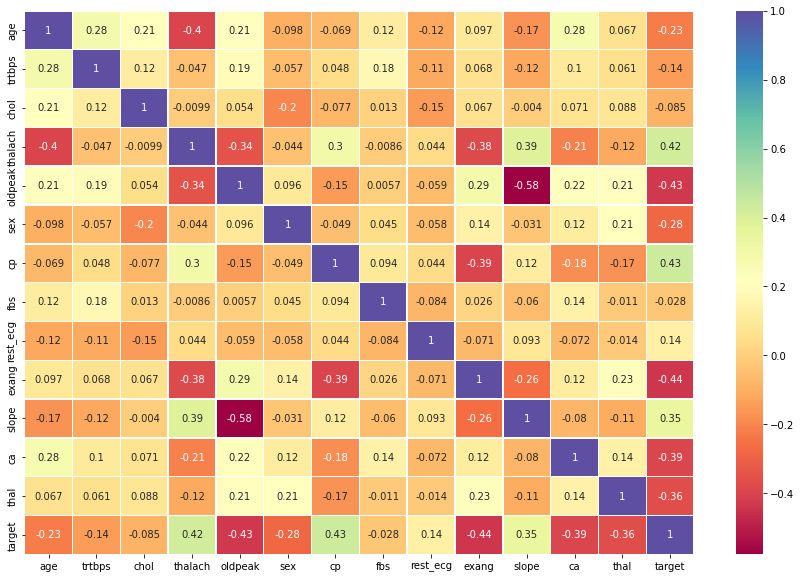

In [78]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

#### 4.2.8.1 Analysis Outputs(11) <a id = 38></a>

#### Age Variable

* The variable with the highest correlation with the "age" variable is the "thalach" variable. There is a negative correlation between them, which we can call moderately. 
* The severity of the correlation is -0.40. In other words, there is an inverse relationship between the "age" and "thalach" variables. 
* If we make a quick assessment in this context, we can say that the amount of heart rate reached decreases as age increases because there is an inverse proportion between them.

#### Trtbps Variable

* The variable with the highest correlation with the "trtbps" variable is the "age" variable. The correlation between them is 0.28
* There is a positive low-intensity correlation.

#### Chol Variable

* The variable with the highest correlation with the "chol" variable is the "age" variable
* There is a correlation with a magnitude of 0.21. This is a low positive correlation. 
* So, we can say that as age increases, cholesterol also increases.

#### Thalach Variable

* The variable with the highest correlation to the "Thalach" variable is the "target" variable. 
* There is a 0.42 positive and moderate correlation between them. In other words, it is a variable that can directly trigger a heart attack.
* There is a variable with which this variable has many correlations. 
* It means that the maximum heart rate reached maybe a situation triggered by other variables.

#### Oldpeak Variable

* It has the most significant correlation ratio among this changing table. This correlation is -0.58 with the "slope" variable. 
* There is a negative correlation between them, which is slightly above medium intensity. 
* The most significant correlation after the "slope" variable is with the "target" variable. 

#### Sex Variable

* There is no robust correlation between the variable "Sex" and other variables.
* The highest figure is -0.28 with the target variable. There is a negative low-intensity correlation between them.

#### Cp Variable

* Cp variable captures the high correlation with "thalach", "exang", and "target" variables.
* The highest is again the "target" variable. There is a direct proportion between them.

#### Fbs Variable

* The "Fbs" variable generally does not correlate with other variables. 
* The highest correlation with 0.18 belongs to the "trtbps" variable. There is a low positive correlation.
* But we can say that when fasting blood sugar increases, resting blood pressure also increases.

#### Rest_ecg Variable

* There is no strong correlation between the "Rest_ecg" variable and other variables.
* The highest correlation was 0.14 with the "target" variable. There is a positive low-intensity correlation.

#### Exang Variable

* The variable with the highest correlation to the exercise-induced angina variable is the target variable with -0.44
* Also, It seems to be associated with more than one variable except "target". 

#### Slope Variable

* The variable with the highest correlation to the "slope" variable is the old peak variable. There is an above-moderate correlation between these two. It is the most significant relationship in the table with 0.58
* It has a moderate correlation with the variables "thalach" and "target".
* The relationship with other variables is fragile

#### Ca Variable

* The variable with which the "Ca" variable has the highest correlation is the target variable with -0.39. 
* Then comes the "age" variable with 0.28. We can say that there is a low positive correlation with the age variable.

#### Thal Variable

* The variable with which the "Thal" variable has the highest correlation is the variable "target" with -0.36.
* It has not had very high correlation coefficients with other variables.

#### Target Variable

* The "target" variable correlates with more than one variable. 
* In general, we can say a relationship is below the middle level.

### 5. Preparation for Modeling <a id = 39></a>


#### 5.1 Dropping Columns with Low Correlation<a id = 40></a>

In [79]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

In [81]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


#### 5.2 Struggling Outliers <a id = 41></a>

#### 5.2.1 Visualizing outliers <a id = 42></a>

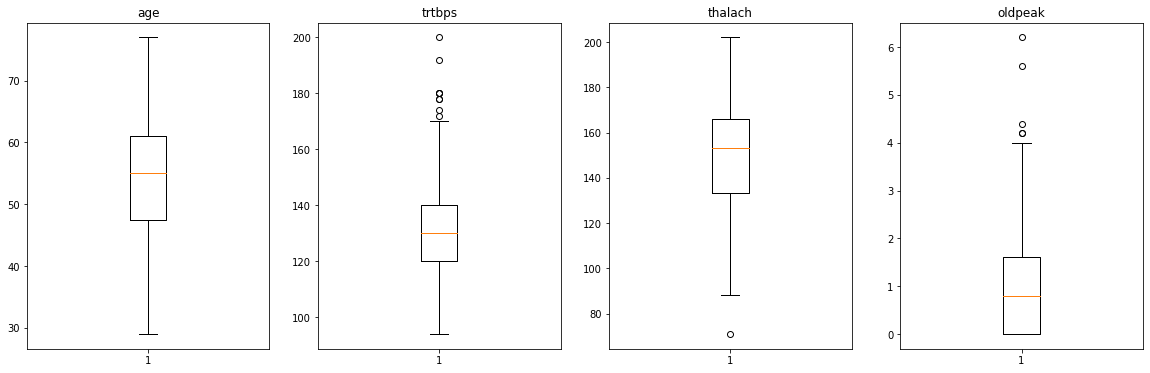

In [82]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

#### 5.2.1.1 Analysis Outputs(12) <a id = 43></a>

#### Age Variable

* We can see the exact image we want in this variable. There are no outliers. And the box stands at the midpoint of the whiskers.

#### Trtbps Variable

* There are more outliers in the "trtbps" variable than the others.
* In terms of distribution, an image is very prone to normal distribution. The box appears near the middle of the two whiskers.

#### Thalach Variable

* There are very few outliers. There is one outlier in part under the mustache. 
* There is some closeness to the normal distribution in terms of distribution, but the box is slightly shifted upwards. It means that our data is somewhat concentrated on the right. 
* In summary, we can say that there is a slight left skew.

#### Oldpeak Variable

* There is no such thing as a lower whisker in the Oldpeak variable. The bottom of the box is at the level of the lower mustache. It means that the values are concentrated on the left side. So we can say that there is a queue to the right. So there is a right skew.
* If we examine the mustache at the top, we can see the outliers above the mustache.

#### 5.2.2 Dealing with outliers <a id = 44></a>


#### 5.2.2.1 Trtbps Variable <a id = 45></a>

In [83]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [84]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [85]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [86]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [87]:
df[df["trtbps"] < 170].trtbps.max()

165

In [88]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [89]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [90]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

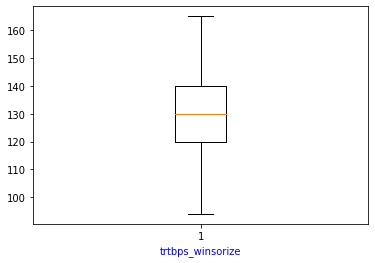

In [91]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [92]:
df["trtbps_winsorize"] = trtbps_winsorize

In [93]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


#### 5.2.2.2 Thalach Variable <a id = 46></a>

In [94]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [95]:
thalach_out = iqr(df, "thalach")

In [96]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [97]:
df.drop([272], axis = 0, inplace = True)

In [98]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

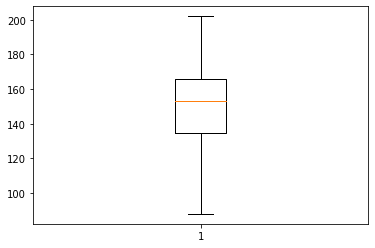

In [99]:
plt.boxplot(df["thalach"]);

#### 5.2.2.3 Oldpeak Variable <a id = 47></a>

In [100]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [101]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [102]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [103]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801324503311258


In [104]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

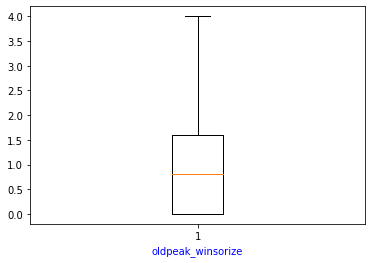

In [105]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [106]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [107]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [108]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [109]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


#### 5.3 Determining Distributions of Numeric Variables<a id = 48></a>


In [110]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


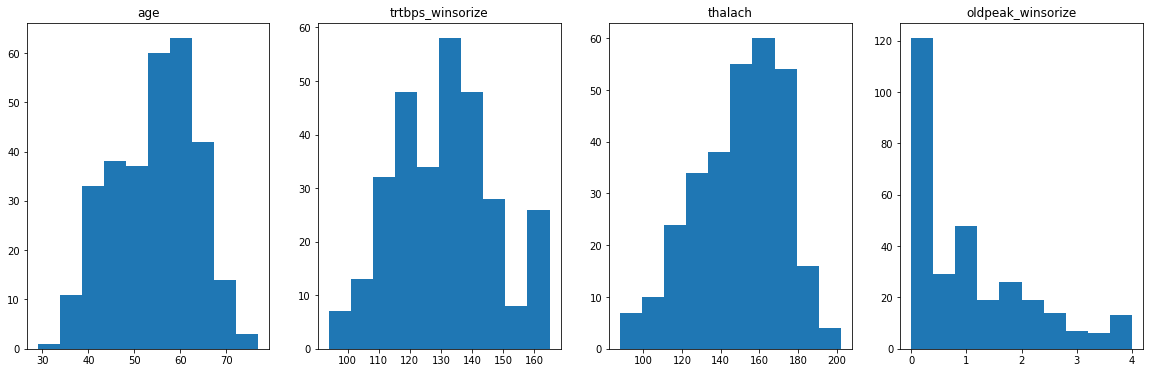

In [111]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [112]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


#### 5.4 Transformation Operations on Unsymmetrical Data<a id = 49></a>

In [113]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [114]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [115]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()


,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [116]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)


In [117]:
df.head()


,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


#### 5.5 Applying One Hot Encoding Method to Categorical Variables<a id = 50></a>


In [118]:
df_copy = df.copy()


In [119]:
df_copy.head()


,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [120]:
categoric_var


['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [121]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [122]:
categoric_var


['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [123]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [124]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


#### 5.6 Feature Scaling with the RobustScaler Method for Machine Learning Algorithms<a id = 51></a>

In [125]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [126]:
robus_scaler = RobustScaler()

In [127]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [128]:
df_copy.head()


,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


#### 5.7 Separating Data into Test and Training Set<a id = 52></a>


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [132]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,1,0,0,0,1,1,0,1,0,0,0,0,1
82,0.363636,0.222222,-1.40,-0.707107,0,0,1,0,0,0,1,1,0,0,0,1,0
187,-0.072727,-1.396825,-0.30,0.465497,1,0,0,0,1,1,0,1,0,0,0,0,1
259,-1.236364,0.920635,-0.50,0.833997,1,0,0,1,1,1,0,0,0,0,0,0,1
5,0.145455,-0.158730,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,0,0


In [133]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [134]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


### 6. Modelling <a id = 53></a>


#### 6.1 Logistic Regression Algorithm <a id = 54></a>


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [136]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [137]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [138]:
y_pred = log_reg.predict(X_test)

In [139]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


#### 6.1.1 Cross Validation <a id = 55></a>

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


#### 6.1.2 Roc Curve and Area Under Curve(AUC) <a id = 56></a>

In [143]:
from sklearn.metrics import plot_roc_curve

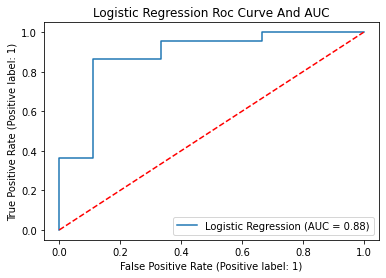

In [144]:
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 6.1.3 Hyperparameter Optimization(**with GridSearchCV**) <a id = 57></a>

In [145]:
from sklearn.model_selection import GridSearchCV


In [146]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [147]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [148]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [149]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [150]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [151]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [152]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [153]:
y_pred = log_reg_new2.predict(X_test)

In [154]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


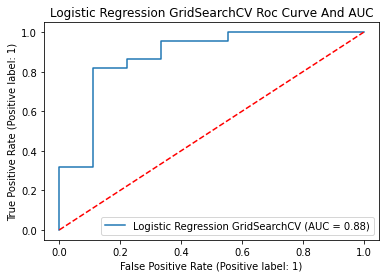

In [155]:
plot_roc_curve(log_reg_new2, X_test, y_test, name = "Logistic Regression GridSearchCV")
plt.title("Logistic Regression GridSearchCV Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 6.2 Decision Tree Algorithm <a id = 58></a>


In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [158]:
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=5)

In [159]:
y_pred = dec_tree.predict(X_test)

In [160]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))


The test accuracy score of Decision Tree is: 0.8387096774193549


In [161]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


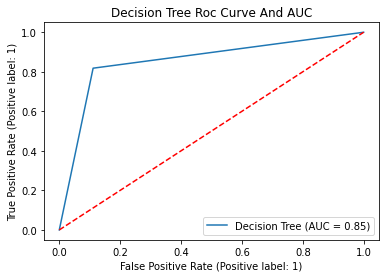

In [162]:
plot_roc_curve(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 6.3 Support Vector Machine Algorithm <a id = 59></a>

In [163]:
from sklearn.svm import SVC

In [164]:
svc_model = SVC(random_state = 5)


In [165]:
svc_model.fit(X_train, y_train)


SVC(random_state=5)

In [166]:
y_pred = svc_model.predict(X_test)


In [167]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))


The test accuracy score of SVM is: 0.8709677419354839


In [168]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


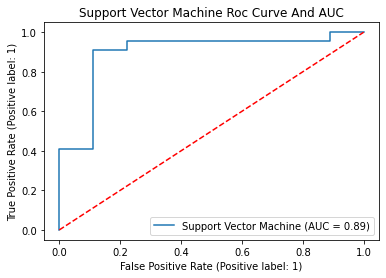

In [169]:
plot_roc_curve(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 6.4 Random Forest Algorithm <a id = 60></a>


In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
random_forest = RandomForestClassifier(random_state = 5)

In [172]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [173]:
y_pred = random_forest.predict(X_test)


In [174]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8387096774193549


In [175]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8999999999999998


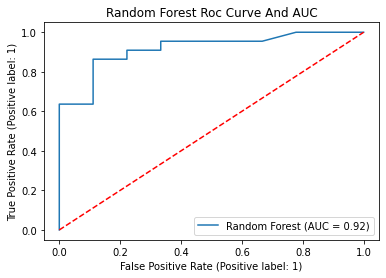

In [176]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

#### 6.4.1 Hyperparameter Optimization(**with GridSearchCV**) <a id = 61></a>

In [177]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [178]:
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}

In [179]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)

In [180]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [181]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}


In [182]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200, random_state = 5)

In [183]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=5)

In [184]:
y_pred = random_forest_new2.predict(X_test)

In [185]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.9032258064516129


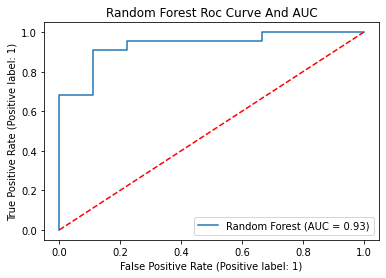

In [186]:
plot_roc_curve(random_forest_new2, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### 7. Project Conclusion <a id = 62></a>

**The activities we carried out within the scope of the project are as follows:**
1. Within the scope of the project, we first made the data set ready for **Exploratory Data Analysis(EDA)**
2. We performed **Exploratory Data Analysis(EDA)**. 
3. We analyzed numerical and categorical variables within the scope of univariate analysis by using **Distplot** and **Pie Chart** graphics.
4. Within the scope of bivariate analysis, we analyzed the variables among each other using **FacetGrid, Count Plot, Pair Plot, Swarm plot, Box plot, and Heatmap** graphics.
5. We made the data set ready for the model. In this context, we struggled with **missing** and **outlier** values. 
6. We used **four different algorithms** in the model phase.
7. We got **87% accuracy** and **88% AUC** with the **Logistic Regression model**.
8. We got **83% accuracy** and **85% AUC** with the **Decision Tree Model**.
9. We got **83% accuracy** and **89% AUC** with the **Support Vector Classifier Model**.
10. And we got **90.3% accuracy** and **93% AUC** with the **Random Forest Classifier Model**.
11. When all these model outputs are evaluated, we **prefer** the model we created with the **Random Forest Algorithm**, which gives the **best results**.
**See you in the next project.**

[Go to Project Content](#63)